In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import seaborn as sns
sns.set()

# Numerical Data Manipulation libraries
import pandas as pd
import numpy as np
import statistics as stat


# Naive Bayes libraries
import sklearn
from sklearn.naive_bayes import BernoulliNB      # Naive Bayes Classifier based on a Bernoulli Distribution
from sklearn.naive_bayes import GaussianNB       # Naive Bayes Classifier based on a Gaussian Distribution
from sklearn.naive_bayes import MultinomialNB    # Naive Bayes Classifier based on a Multinomial Distribution

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Text Analysis libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import pandas as pd 

from PIL import Image
import colorsys
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from os import walk
import os
from skimage.transform import resize
import warnings

In [2]:
def generate_image_array(file_path):
    im = Image.open(file_path)
    width, height = im.size
    pix = im.load()
    image_0 = []
    for x in [(x*round(width/64.0)) for x in range(0,64)]:
        for y in [(y*round(height/64.0)) for y in range(0,64)]:
            xx = x
            yy = y
            if (x >= width):
                xx = width-1
            if (y >= height):
                yy = height-1
            vals = [c/255.0 for c in pix[yy,xx]]
            l = colorsys.rgb_to_hls(vals[0],vals[1],vals[2])[1]
            image_0.append(l)
    return image_0

def show_image_from_image_array(image_array):
    warnings.filterwarnings("ignore")
    image_0 = np.array(image_0)
    image_0 = np.reshape(image_0, (64, 64))
    image_0 = resize(image_0, (128, 128), anti_aliasing=True)
    plt.imshow(image_array,  cmap=plt.cm.gray )


In [3]:

HOME_PATH = "/home/jovyan"

# Function for getting the images
def get_images_from_directory(IMAGES_INNOCENT_PATH):
    f = []
    for (dirpath, dirnames, filenames) in walk( HOME_PATH + IMAGES_INNOCENT_PATH ):
        f.extend(filenames)
        break
    f = [HOME_PATH+IMAGES_INNOCENT_PATH+ff for ff in f]
    return f

base_df_dict = {}
for i in range(0, 4096):
    base_df_dict.update({ "pixel_"+str(i) : [] })
base_df_dict.update({ "target" : [] })
base_df = pd.DataFrame(base_df_dict)


def populate_dataset(base_df, path, target_type):
    for each_image in get_images_from_directory(path):
        this_image = [round(x*255) for x in generate_image_array(each_image)]
        image_dictionary = {}
        for i in range(0, len(this_image)):
            image_dictionary.update({"pixel_"+str(i) : [this_image[i]]})
        image_dictionary.update({"target" : [target_type]})
        add_df = pd.DataFrame(image_dictionary)
        base_df = base_df.append(add_df, ignore_index = True)
    return base_df

base_df = populate_dataset(base_df, "/29Apr/data/banner/young/", 0)
base_df = populate_dataset(base_df, "/29Apr/data/banner/old/", 1)
base_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,target
0,50.0,56.0,70.0,71.0,80.0,74.0,90.0,90.0,80.0,80.0,...,254.0,245.0,182.0,197.0,244.0,249.0,253.0,249.0,248.0,0.0
1,65.0,77.0,109.0,116.0,146.0,148.0,90.0,82.0,48.0,56.0,...,68.0,72.0,78.0,80.0,80.0,77.0,77.0,84.0,95.0,0.0
2,242.0,242.0,242.0,242.0,243.0,249.0,169.0,92.0,154.0,173.0,...,214.0,214.0,204.0,209.0,191.0,182.0,192.0,204.0,208.0,0.0
3,36.0,44.0,60.0,72.0,80.0,81.0,82.0,83.0,82.0,80.0,...,252.0,250.0,254.0,252.0,253.0,253.0,254.0,253.0,253.0,0.0
4,57.0,88.0,82.0,66.0,36.0,46.0,52.0,50.0,48.0,47.0,...,247.0,248.0,248.0,248.0,248.0,248.0,248.0,248.0,248.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,62.0,47.0,57.0,58.0,63.0,54.0,51.0,50.0,52.0,54.0,...,56.0,54.0,16.0,8.0,39.0,70.0,30.0,2.0,38.0,1.0
207,81.0,80.0,68.0,66.0,38.0,20.0,22.0,24.0,24.0,14.0,...,28.0,14.0,20.0,28.0,128.0,142.0,66.0,57.0,98.0,1.0
208,47.0,51.0,44.0,45.0,51.0,63.0,78.0,88.0,98.0,110.0,...,74.0,52.0,38.0,63.0,89.0,110.0,166.0,188.0,188.0,1.0
209,53.0,64.0,59.0,36.0,28.0,54.0,83.0,111.0,136.0,142.0,...,30.0,29.0,41.0,58.0,76.0,70.0,59.0,55.0,43.0,1.0


In [4]:
def predict( model, image, print_img ):
    
    if( print_img ):
        plt.grid(b=None)
        plt.imshow(image)
    
    n_image = np.expand_dims(image, axis=0)
    n_image = np.expand_dims(n_image, axis=3)
    
    prediction = model.predict( n_image )[0]
    
    if( prediction >= 0.5 ):
        if( print_img ):
            print('Model Prediction: OLD with probability = %.2f' % prediction)
        result = 1
    else:
        if( print_img ):
            print('Model Prediction: NOT OLD with probability = %.2f' % prediction)
        result = 0
        
    return result

def check_image_dataset( dataset, class_var ):
    
    last_pixels = dataset[["pixel_4092", "pixel_4093", "pixel_4094", "pixel_4095", class_var]]
    return last_pixels
    

In [5]:
faces_dataset = base_df

In [6]:
# total number of images in dataset:
num_images = len(faces_dataset)
num_pixels = len(faces_dataset.columns) - 1

print('Total number of images in the dataset is: ' + str(num_images))
print('Total number of pixels per image is: ' + str(num_pixels))

Total number of images in the dataset is: 211
Total number of pixels per image is: 4096


In [7]:
# We can also try to understand what is the distribution of criminals / not crimials in our dataset:
criminals = faces_dataset[ faces_dataset['target'] == 1 ]
not_criminals = faces_dataset[ faces_dataset['target'] == 0 ]

print('Criminality distribution:')
print('Number of criminals: ' + str(len(criminals)))
print('Number of not criminals: ' + str(len(not_criminals)))

Criminality distribution:
Number of criminals: 82
Number of not criminals: 129


Image label = NOT OLD


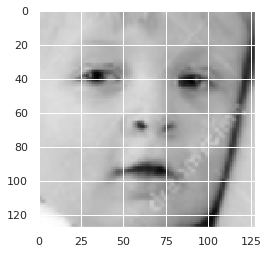

In [8]:
# getting some images... 
from skimage.transform import resize
import warnings
warnings.filterwarnings("ignore")

indx = 120
image_0 = faces_dataset.iloc[indx,0:num_pixels]

# image_0 is a vector with 9216 pixels. In order to convert it into an image,
# we need to reshape this vector into a matrix of 96*96 = 9216 pixels

image_0 =  np.array(image_0)
image_0 = np.reshape(image_0, (64, 64))
image_0 = resize(image_0, (128, 128), anti_aliasing=True)

# show image
plt.imshow(image_0,  cmap=plt.cm.gray )

# print target
if( faces_dataset.iloc[indx,num_pixels] == 1):
    print('Image label = OLD')
else:
    print('Image label = NOT OLD')

In [9]:
all_images = []

WIDTH = 64
HEIGHT = 64

data = faces_dataset.iloc[:,0:num_pixels]
for indx in range(0, len(data)):
    
    image = np.array(data.iloc[indx,0:num_pixels])
    # normalise pixels
    temp = np.reshape(image, (WIDTH, HEIGHT))/255.0
    all_images.append(temp)

# convert structure to array
all_images = np.array(all_images)


In [10]:
# separate your dataset: 
# put the variable that you wish to classify (the target) in one variable
# put your features (the pixels) in another variable
X=np.zeros((num_images,WIDTH,HEIGHT,1))
X[:,:,:,0]=all_images
y = faces_dataset.iloc[:,num_pixels]

In [11]:
# separate the dataset into test set and train set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3 )

In [12]:
# define model
model_deep = Sequential()

# add layers
model_deep.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(WIDTH, HEIGHT, 1)))
model_deep.add(MaxPool2D(pool_size=(2, 2)))
model_deep.add(Dropout(0.25))

model_deep.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(WIDTH, HEIGHT, 1)))
model_deep.add(MaxPool2D(pool_size=(2, 2)))
model_deep.add(Dropout(0.25))
model_deep.add(Flatten())

model_deep.add(Dense(256, activation='tanh'))

model_deep.add(Dense(1, activation='sigmoid'))

In [13]:
# visualise the model
model_deep.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

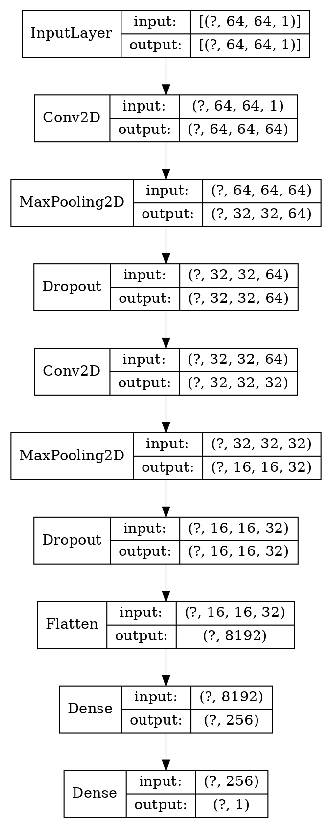

In [14]:
# another way of visualising the network

from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg

plot_model(model_deep, "model_dnn.png", show_shapes=True, show_layer_names=False, rankdir='TB', dpi=150)
img = mpimg.imread("model_dnn.png")
plt.figure(figsize=(10,15))
plt.axis('off');
plt.imshow(img)


In [15]:
# compile model
# SGD = Stochastic Gradient Descent
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_deep.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [16]:
# fit model
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
history_deep = model_deep.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Train on 147 samples, validate on 64 samples
Epoch 1/10
147/147 [==============================] - 2s 10ms/sample - loss: 0.2416 - accuracy: 0.6599 - val_loss: 0.1765 - val_accuracy: 0.7188
Epoch 2/10
147/147 [==============================] - 1s 8ms/sample - loss: 0.1610 - accuracy: 0.7755 - val_loss: 0.1765 - val_accuracy: 0.8281
Epoch 3/10
147/147 [==============================] - 1s 7ms/sample - loss: 0.1721 - accuracy: 0.7415 - val_loss: 0.1650 - val_accuracy: 0.7656
Epoch 4/10
147/147 [==============================] - 1s 7ms/sample - loss: 0.1323 - accuracy: 0.8367 - val_loss: 0.1278 - val_accuracy: 0.8906
Epoch 5/10
147/147 [==============================] - 1s 7ms/sample - loss: 0.1278 - accuracy: 0.8435 - val_loss: 0.1188 - val_accuracy: 0.8125
Epoch 6/10
147/147 [==============================] - 1s 7ms/sample - loss: 0.1051 - accuracy: 0.8707 - val_loss: 0.1004 - val_accuracy: 0.8750
Epoch 7/10
147/147 [==============================] - 1s 8ms/sample - loss: 0.0853 - accur

In [17]:
# evaluate the model
_, train_acc_deep = model_deep.evaluate(X_train, y_train, verbose=0)
_, test_acc_deep = model_deep.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_deep, test_acc_deep))

Train: 0.973, Test: 0.953


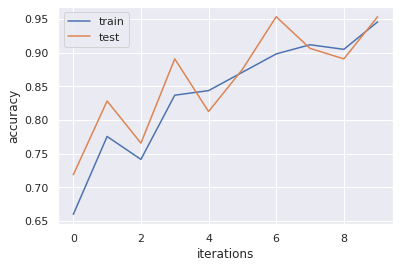

In [18]:
# plot training history
pyplot.plot(history_deep.history['accuracy'], label='train')
pyplot.plot(history_deep.history['val_accuracy'], label='test')
pyplot.ylabel('accuracy', fontsize=12)
pyplot.xlabel('iterations', fontsize=12)
pyplot.legend()
pyplot.show()

Model Prediction: NOT OLD with probability = 0.06


0

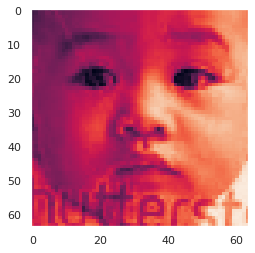

In [19]:
indx = 0
image = all_images[indx,:,:]
predict( model_deep, image, True )

Model Prediction: NOT OLD with probability = 0.10


0

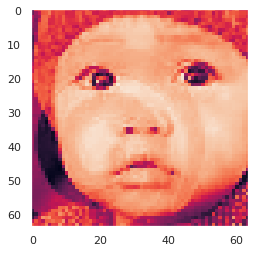

In [23]:
indx = 32
image = all_images[indx,:,:]
predict( model_deep, image, True )

In [21]:
from sklearn.metrics import classification_report

results = []
for indx in range(0, len(X_test)):
    
    image = X_test[indx,:,:,0]
    r = predict( model_deep, image, False )
    results.append(r)

In [22]:
names=['NOT OLD', 'OLD']
print(classification_report(y_test.values, results, target_names=names))

              precision    recall  f1-score   support

     NOT OLD       0.88      0.98      0.92        44
         OLD       0.93      0.70      0.80        20

    accuracy                           0.89        64
   macro avg       0.91      0.84      0.86        64
weighted avg       0.89      0.89      0.89        64



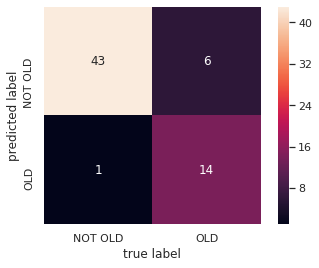

In [23]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, results)
sns.heatmap(mat.T, square=True, fmt='d', cbar=True, xticklabels=names, \
            yticklabels=names, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');